In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#using quoting =2 will help ignore the commas as seperators, and instead look at them as grammar
#wine_data = pd.read_csv("./winemagdata130kv2.csv", quoting=2)
#wine_data.shape

(129971, 14)

In [6]:
#look at the first row of data
#wine_data.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [8]:
#subset the data, and only look at description and points
#wine_data = wine_data[["description", "points"]]
#wine_data.head(1)

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87.0


In [12]:
#further shrink the data...just to learn these methods
#wine_data = wine_data.sample(1000, random_state=1693).reset_index(drop=True) #reset index just resets the index for this sample
#wine_data.shape

(1000, 2)

In [13]:
#I commented out the previous lines to maintain the codes, but here is the only snipet we actually need
wine_data = pd.read_csv("./winemagdata130kv2.csv", quoting=2)
wine_data = wine_data[["description", "points"]]
wine_data = wine_data.sample(1000, random_state=1693).reset_index(drop=True) 
wine_data.shape

(1000, 2)

In [29]:

#some NLP libraries
import re  #regex
import time
import nltk

from nltk import download
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
#download('stopwords')

[nltk_data] Downloading package stopwords to /home/scott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
print(wine_data["description"][0])

Of all the Atauta single-vineyard wines from the sensational 2011 vintage, La Mala is arguably the most overtly oaky and modern in style. Grainy, resiny barrel-driven aromas come with controlled burn and heat. This is tannic and firm as cement, with ample oak resin creating a creamy feel. Resiny, fully spiced black-fruit flavors end with pepper, wood grain, burnt toast and other oaky notes. Drink from 2018–2031.


In [27]:
wine_description = re.sub('[^a-zA-Z0-9 ]', '', wine_data["description"][0])
wine_description

'Of all the Atauta singlevineyard wines from the sensational 2011 vintage La Mala is arguably the most overtly oaky and modern in style Grainy resiny barreldriven aromas come with controlled burn and heat This is tannic and firm as cement with ample oak resin creating a creamy feel Resiny fully spiced blackfruit flavors end with pepper wood grain burnt toast and other oaky notes Drink from 20182031'

In [32]:
wine_description = wine_description.lower() #change everything to lowercase
wine_description

'of all the atauta singlevineyard wines from the sensational 2011 vintage la mala is arguably the most overtly oaky and modern in style grainy resiny barreldriven aromas come with controlled burn and heat this is tannic and firm as cement with ample oak resin creating a creamy feel resiny fully spiced blackfruit flavors end with pepper wood grain burnt toast and other oaky notes drink from 20182031'

In [34]:
wine_description = wine_description.split() #this will create each word into its own element in a vector
#wine_description

AttributeError: 'list' object has no attribute 'split'

In [37]:
#iterate over every word in the vector, and keep it if is NOT in the stopwords list
wine_description = [word for word in wine_description if not word in set(stopwords.words('english'))]
#wine_description


In [40]:
stemmer = PorterStemmer()

#iterate over every word and just the root of each word (no tenses, plurals, etc)
wine_description = [stemmer.stem(word) for word in wine_description]
#wine_description

In [42]:
# before this line, the list of words was a long column vector, this returns it back as a single string
wine_description = " ".join(wine_description)
wine_description

'a t a u t a   s i n g l e v i n e y a r d   w i n e   s e n s a t   2 0 1 1   v i n t a g   l a   m a l a   a r g u a b l   o v e r t l i   o a k i   m o d e r n   s t y l e   g r a i n i   r e s i n i   b a r r e l d r i v e n   a r o m a   c o m e   c o n t r o l   b u r n   h e a t   t a n n i c   f i r m   c e m e n t   a m p l   o a k   r e s i n   c r e a t   c r e a m i   f e e l   r e s i n i   f u l l i   s p i c e   b l a c k f r u i t   f l a v o r   e n d   p e p p e r   w o o d   g r a i n   b u r n t   t o a s t   o a k i   n o t e   d r i n k   2 0 1 8 2 0 3 1'

In [43]:
%%time
#in python i think it is start=time.time()
wine_data = pd.read_csv("./winemagdata130kv2.csv", quoting=2)
wine_data = wine_data[["description", "points"]]
wine_data = wine_data.sample(1000, random_state=1693).reset_index(drop=True) 

corpus = []

for i in range(0, len(wine_data)):
    wine_description = re.sub('[^a-zA-Z0-9 ]', '', wine_data["description"][i])
    wine_description = wine_description.lower()
    wine_description = wine_description.split()
    wine_description = [word for word in wine_description if not word in set(stopwords.words('english'))]
    stemmer = PorterStemmer()
    wine_description = [stemmer.stem(word) for word in wine_description]
    wine_description = " ".join(wine_description)
    corpus.append(wine_description)
    
#end=time.time()
#print("CPU time (in seconds): " + str(end-start))

CPU times: user 5.46 s, sys: 457 ms, total: 5.92 s
Wall time: 5.92 s


In [44]:
#print(wine_data["description"][2]) # or try 345
#print(corpus[2]) #or try 345

This medium-bodied Sauvignon Blanc adds a bit of creamy depth on the midpalate, while its aromas and flavors of fig and melon are on the ripe side for Marlborough. Despite that, it's still clean and refreshing, with a long, citrus-pith finish.
mediumbodi sauvignon blanc add bit creami depth midpal aroma flavor fig melon ripe side marlborough despit still clean refresh long citruspith finish


In [46]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer()  
x_raw = countVec.fit_transform(corpus) #gets the word occurence count for each word in every sentance 
x = x_raw.toarray() #turn this into a feature matrix

CPU times: user 77.1 ms, sys: 12.6 ms, total: 89.7 ms
Wall time: 88 ms


In [49]:
#x
#print(pd.DataFrame(x_raw.A, columns=countVec.get_feature_names()).transpose())

              0    1    2    3    4    5    6    7    8    9   ...   990  991  \
04              0    0    0    0    0    0    0    0    0    0 ...     0    0   
06              0    0    0    0    0    0    0    0    0    0 ...     0    0   
07              0    0    0    0    0    0    0    0    0    0 ...     0    0   
08              0    0    0    0    0    0    0    0    0    0 ...     0    0   
10              0    0    0    0    0    0    0    0    0    0 ...     0    0   
100             0    0    0    0    0    0    0    0    0    0 ...     0    0   
1015            0    0    0    0    0    0    0    0    0    0 ...     0    0   
11              0    0    0    0    0    0    0    0    0    0 ...     0    0   
12              0    0    0    0    0    0    0    0    0    1 ...     0    0   
1200feet        0    0    0    0    0    0    0    0    0    0 ...     0    0   
12th            0    0    0    0    0    0    0    0    0    0 ...     0    0   
12thcenturi     0    0    0 

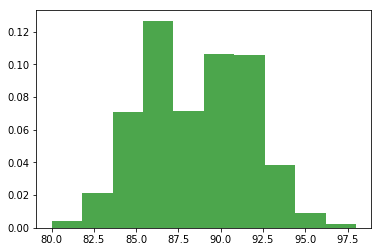

In [50]:
#look atthe histogram of the data
n, bins, patches = plt.hist(wine_data["points"].values, 10, density=1, facecolor="green", alpha=0.7)
#plt.savefig("outputs/nlp_hist.png")
#
#we can use this to determine a break point for good v other wine

In [53]:
#this is going to create a new classification to use to fit the feature matrix on this new classification
y = wine_data["points"]
y = y.where(y>90, other=0).where(y <= 90, other=1).values
#y

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1693)
classifier = LogisticRegression(random_state = 1693)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
#y_pred

In [57]:
from sklearn.metrics import confusion_matrix


def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

# This is slightly different than the video, which has a small error.
confMat = confusion_matrix(y_test, y_pred)
print_cm(confMat, ["Bad Wine", "Good Wine"])

#top is the truth, left side is our prediction

               Bad Wine Good Wine 
     Bad Wine     165.0      12.0 
    Good Wine      41.0      32.0 


In [68]:
#answer lab questions

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(x,y,test_size=0.25, random_state=1693)
#scale_x = StandardScaler()
#dt_x_train = scale_x.fit_transform(dt_x_train)
#dt_x_test = scale_x. transform(dt_x_test)
#dt_classifier = DecisionTreeClassifier(random_state = 1693, max_depth=3)
dt_classifier = DecisionTreeClassifier(random_state = 1693)
dt_classifier.fit(dt_x_train, dt_y_train)
dt_y_pred = dt_classifier.predict(dt_x_test)

# This is slightly different than the video, which has a small error.
confMat = confusion_matrix(dt_y_test, dt_y_pred)
print_cm(confMat, ["Bad Wine", "Good Wine"])

               Bad Wine Good Wine 
     Bad Wine     145.0      32.0 
    Good Wine      49.0      24.0 


In [63]:
#answer lab questions
from sklearn.naive_bayes import GaussianNB


nb_x_train, nb_x_test, nb_y_train, nb_y_test = train_test_split(x,y,test_size=0.25, random_state=1693)
bayes_classifier = GaussianNB()
bayes_classifier.fit(nb_x_train, nb_y_train)
nb_y_pred = bayes_classifier.predict(nb_x_test)

confMat= confusion_matrix(nb_y_test, nb_y_pred)
print_cm(confMat, ["Bad Wine", "Good Wine"])

               Bad Wine Good Wine 
     Bad Wine     118.0      59.0 
    Good Wine      44.0      29.0 
